# Introduction to Deep and Transfer Learning

### by Andreas Damianou,  6 March 2019


      **NOTE!!! This notebook will be continuously updated up until the date of the talk!!! **
      
      **NOTE 2!!! This notebook will download around 6mb of files for the demos to work**

Some background on the transfer learning discussion is contained in the following blog post:   
    https://medium.com/apache-mxnet/xfer-an-open-source-library-for-neural-network-transfer-learning-cd5eac4accf0

### First import necessary helper libraries for this tutorial and define helper functions

In [1]:
import numpy as np
from pylab import *
%matplotlib inline

import mxnet as mx
# Install as follows: 
# $pip install mxnet

import xfer
# You can install it with:
#    $pip install xfer-ml

# Or clone and install from souce:
#    https://github.com/amzn/xfer.git

In [2]:
# Define helper function for later

def plot_point(func, t, xmin, xmax):
    N = 10
    x = np.zeros((N,1))+t
    x = x[:,0]
    y = np.linspace(0,func(t),N)
    plt.plot(x,y, 'k--', linewidth=1)
    
    x = np.linspace(xmin, t, N)
    y = np.zeros((N,1))+func(t)
    plt.plot(x,y, 'k--', linewidth=1)

### Define the activation function and its derivative

In [3]:
# Sigmoid activation function
def activation(x):
    return 1/(1+np.exp(-x))

# Derivative of activation wrt input x
def activation_derivative(x):
    # the activation of the sigmoid function conveniently can be written in terms of its outputs.
    f = activation(x)
    return f*(1-f)

# Derivative of activation wrt input x but expressed when activation(x) is given as argument instead of x
def activation_derivative_f(f):
    return f*(1-f)


### Plots to explore the activation

First, plot the activation for input domain between -10 and 10

Text(0,0.5,'activation(x)')

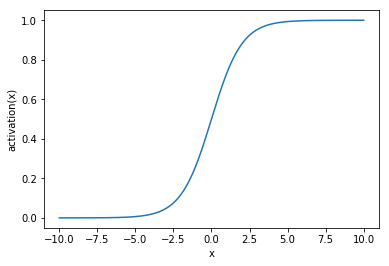

In [4]:
x1 = np.linspace(-10, 10, 500)
plt.plot(x1, activation(x1))
plt.xlabel('x'); plt.ylabel('activation(x)')

Let's see what happens with low, intermediate and high values:

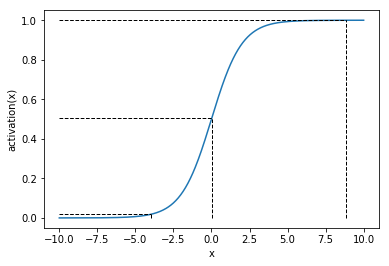

In [5]:
x1 = np.linspace(-10, 10, 500)
plt.plot(x1, activation(x1))
plt.xlabel('x'); plt.ylabel('activation(x)')
plot_point(activation, x1[150], -10, 10)
plot_point(activation, x1[250], -10, 10)
plot_point(activation, x1[470], -10, 10)

Repeat but for the space -20 to 20

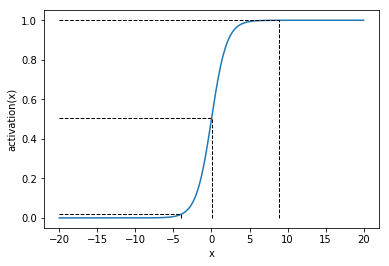

In [6]:
x2 = np.linspace(-20, 20, 500)
plt.plot(x2, activation(x2))
plt.xlabel('x'); plt.ylabel('activation(x)')
plot_point(activation, x1[150], -20, 20)
plot_point(activation, x1[250], -20, 20)
plot_point(activation, x1[470], -20, 20)

Explore the derivative

Text(0,0.5,'activation(x)')

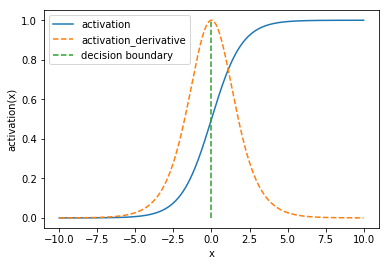

In [7]:
plt.plot(x1, activation(x1))
plt.plot(x1, 4*activation_derivative(x1), '--')
plt.plot(np.zeros((5,1)), np.linspace(0,1,5), '--')
plt.legend(['activation','activation_derivative','decision boundary'])
plt.xlabel('x')
plt.ylabel('activation(x)')

## Logistic regression

In [8]:
# Create some toy data
X = np.array([[0,0,1],
              [0,1,1],
              [1,0,1],
              [1,1,1]])

# Linear case
y = np.array([[0],
              [0],
              [1],
              [1]])

# Fix the seed
np.random.seed(1)

Text(0,0.5,'error in training data')

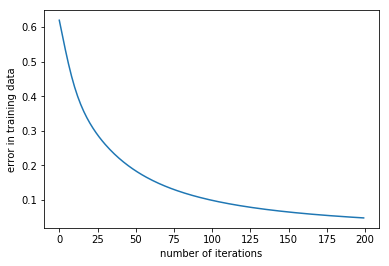

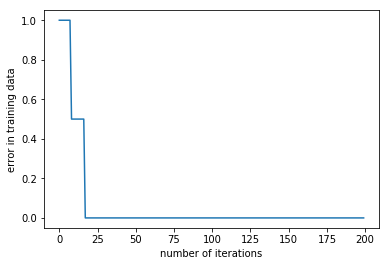

In [9]:
# Initialize weight
W0 = 2*np.random.random((3,1)) - 1
error = []
error_of_rounded = []
fs = []

# Optimize for 2000 iterations
for i in range(200):
    # FORWARD PASS: x -> f1 
    f0 = X
    f1 = activation(np.dot(f0, W0))
    loss = (0.5 * (y-f1)**2 ).sum()
    loss_of_rounded = (0.5 * (y-np.round(f1))**2 ).sum()
    
    # BACKWARDS PASS (derivatives of loss wrt W0)
    e1 = y - f1   # Error contribution
    delta_1 = e1 * activation_derivative_f(f1)  # The gradient contribution from activation
    gradient_1 = np.dot(f0.T,delta_1)
    
    learning_rate = 0.2
    
    # Update the weights. This is simply adding the gradient multiplied by a learning rate
    W0 += learning_rate * gradient_1

    # Keep track of error
    error.append(loss)
    error_of_rounded.append(loss_of_rounded)
    fs.append(f1)

plt.plot(error)
plt.xlabel('number of iterations')
plt.ylabel('error in training data')

plt.figure()
plt.plot(error_of_rounded)
plt.xlabel('number of iterations')
plt.ylabel('error in training data')

## Deep neural network

Create some toy data

In [10]:
X = np.array([[0,0,1],
              [0,1,1],
              [1,0,1],
              [1,1,1]])

# NON-linear case
y = np.array([[0],
               [1],
               [1],
               [0]])

Define parameters and initialize them.

In [11]:
# Fix the seed
np.random.seed(1)

# randomly initialize our weights with mean 0
W0 = 2*np.random.random((3,4)) - 1
W1 = 2*np.random.random((4,1)) - 1


Optimize!

In [12]:
error = []
error_of_rounded = []

# Optimize
for i in range(1000):
    # FORWARD PASS: x -> f1 -> f2
    f0 = X
    f1 = activation(np.dot(f0, W0))
    f2 = activation(np.dot(f1, W1))
    # Normally we'd use the cross-entropy loss, but here we'll use sq. error to make derivatives easier.
    loss = (0.5 * (y-f2)**2 ).sum()
    loss_of_rounded = (0.5 * (y-np.round(f2))**2 ).sum()
    
    # BACKWARDS PASS
    e2 = y - f2
    delta_2 = e2 * activation_derivative_f(f2)

    e1 = np.dot(delta_2, W1.T)
    delta_1 = e1 * activation_derivative_f(f1)

    gradient_0 = f0.T.dot(delta_1)
    gradient_1 = f1.T.dot(delta_2)
        
    # Update the weights
    learning_rate = 0.8
    W0 += learning_rate * gradient_0
    W1 += learning_rate * gradient_1

    # Keep track of error
    error.append(loss)
    error_of_rounded.append(loss_of_rounded)

Plot the error per iteration of the optimization.

Text(0,0.5,'error in training data')

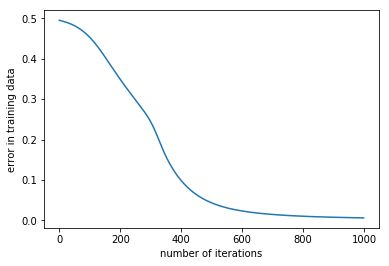

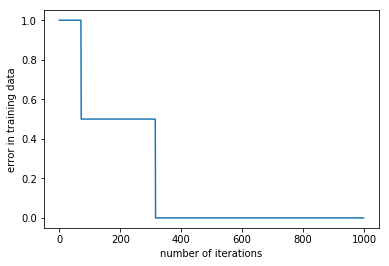

In [13]:
plt.plot(error)
plt.xlabel('number of iterations')
plt.ylabel('error in training data')

plt.figure()
plt.plot(error_of_rounded)
plt.xlabel('number of iterations')
plt.ylabel('error in training data')

### With Automatic differentiation


In [14]:
from __future__ import print_function
import mxnet as mx
from mxnet import nd, autograd, gluon

np.random.seed(1)
mx.random.seed(1)

Define the parameters.

In [15]:
W0 = 2*nd.random.randn(3,4, ctx=mx.cpu()) - 1
W1 = 2*nd.random.randn(4,1, ctx=mx.cpu()) - 1
params = [W0, W1]
for param in params:
    param.attach_grad()

Define the neural network structure.

In [16]:
def activation_mx(x):
    return 1/(1+nd.exp(-x))

def net(X):
    f1 = activation_mx(nd.dot(X, W0))
    f2 = activation_mx(nd.dot(f1, W1))
    return f2

Do optimization!

In [17]:
error = []
error_of_rounded = []

for i in range(2000):
    # We do forward pass while recording the symbolic graph so as to be able to do automatic differentiation
    with autograd.record():
        # FORWARD PASS
        f2 = net(nd.array(X))
        loss = nd.sum(0.5 * (nd.array(y)-f2)**2 )
    loss_of_rounded = nd.sum(0.5 * (nd.array(y)-np.round(f2))**2 )

    # BACKWARDS PASS
    loss.backward()

    # PARAMETER UPDATE
    for param in params:
        param[:] = param - 0.8 * param.grad

    # Keep track of error
    error.append(loss.asscalar())
    error_of_rounded.append(loss_of_rounded.asscalar())

    

Plot the error per iteration of the optimization:

Text(0,0.5,'error in training data')

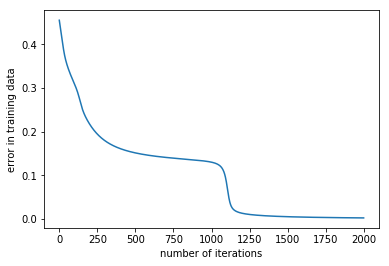

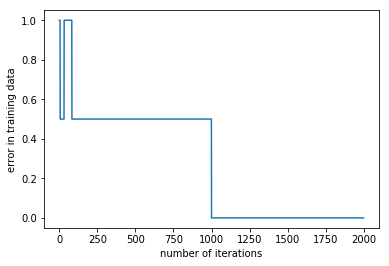

In [18]:
plt.plot(error)
plt.xlabel('number of iterations')
plt.ylabel('error in training data')

plt.figure()
plt.plot(error_of_rounded)
plt.xlabel('number of iterations')
plt.ylabel('error in training data')

## Reusing deep neural networks

In [19]:
import xfer
# You can install it with:
#    $pip install xfer-ml

# Or clone and install from souce:
#    https://github.com/amzn/xfer.git

In [20]:
path = 'http://data.mxnet.io/models/imagenet/'
[mx.test_utils.download(path+'squeezenet/squeezenet_v1.1-0000.params'),
mx.test_utils.download(path+'squeezenet/squeezenet_v1.1-symbol.json')]

['squeezenet_v1.1-0000.params', 'squeezenet_v1.1-symbol.json']

Just utility functions to handle data.

In [21]:
import json, os
def get_iterators_from_folder(data_dir, train_size=0.6, batchsize=10, label_name='softmax_label', data_name='data', random_state=1):
    import os,glob
    from sklearn.model_selection import StratifiedShuffleSplit
    """
    Method to create iterators from data stored in a folder with the following structure:
    /data_dir
        /class1
            class1_img1
            class1_img2
            ...
            class1_imgN
        /class2
            class2_img1
            class2_img2
            ...
            class2_imgN
        ...
        /classN
    """
    # assert dir exists
    if not os.path.isdir(data_dir):
        raise ValueError('Directory not found: {}'.format(data_dir))
    # get class names
    classes = [x.split('/')[-1] for x in glob.glob(data_dir+'/*')]
    classes.sort()
    fnames = []
    labels = []
    for c in classes:
            # get all the image filenames and labels
            images = glob.glob(data_dir+'/'+c+'/*')
            images.sort()
            fnames += images
            labels += [c]*len(images)
    # create label2id mapping
    id2label = dict(enumerate(set(labels)))
    label2id = dict((v,k) for k, v in id2label.items())

    # get indices of train and test
    sss = StratifiedShuffleSplit(n_splits=2, test_size=None, train_size=train_size, random_state=random_state)
    train_indices, test_indices = next(sss.split(labels, labels))

    train_img_list = []
    test_img_list = []
    train_labels = []
    test_labels = []
    # create imglist for training and test
    for idx in train_indices:
        train_img_list.append([label2id[labels[idx]], fnames[idx]])
        train_labels.append(label2id[labels[idx]])
    for idx in test_indices:
        test_img_list.append([label2id[labels[idx]], fnames[idx]])
        test_labels.append(label2id[labels[idx]])

    # make iterators
    train_iterator = mx.image.ImageIter(batchsize, (3,224,224), imglist=train_img_list, label_name=label_name, data_name=data_name,
                                        path_root='')
    test_iterator = mx.image.ImageIter(batchsize, (3,224,224), imglist=test_img_list, label_name=label_name, data_name=data_name,
                                      path_root='')

    return train_iterator, test_iterator, train_labels, test_labels, id2label, label2id


def get_images(iterator):
    """
    Returns list of image arrays from iterator
    """
    iterator.reset()
    images = []
    while True:
        try:
            batch = iterator.next().data[0]
            for n in range(batch.shape[0]):
                images.append(batch[n])
        except StopIteration:
            break
    return images


def show_predictions(predictions, images, id2label, uncertainty=None, figsize=(9,1.2), fontsize=12, n=8):
    """
    Plots images with predictions as labels. If uncertainty is given then this is plotted below as a
    series of horizontalbar charts.
    """
    num_rows = 1 if uncertainty is None else 2

    plt.figure(figsize=figsize)
    for cc in range(n):
        plt.subplot(num_rows,n,1+cc)
        plt.tick_params(
                        axis='both',          # changes apply to the x-axis
                        which='both',      # both major and minor ticks are affected
                        bottom=False,      # ticks along the bottom edge are off
                        top=False,         # ticks along the top edge are off
                        left=False,
                        labelleft=False,
                        labelbottom=False) # labels along the bottom edge are off
        plt.imshow(np.uint8(images[cc].asnumpy().transpose((1,2,0))))
        plt.title(id2label[predictions[cc]].split(',')[0], fontsize=fontsize)
        plt.axis
        
if not os.path.isfile('imagenet1000-class-to-human.json'):
    import urllib.request
    urllib.request.urlretrieve('https://raw.githubusercontent.com/amzn/xfer/master/docs/demos/imagenet1000-class-to-human.json', 'imagenet1000-class-to-human.json')

# This utility just allows us to translate image-id's of the imagenet dataset to human-readable labels
with open('imagenet1000-class-to-human.json', 'r') as fp:
    imagenet_class_to_human = json.load(fp)

imagenet_class_to_human = {int(k): v for k, v in imagenet_class_to_human.items()}

In [22]:
# Load train and test data  
if not os.path.isdir('test_sketches'):
    import urllib.request, zipfile
    urllib.request.urlretrieve('http://adamian.github.io/talks/test_sketches.zip', 'test_sketches.zip')
    zip_ref = zipfile.ZipFile('test_sketches.zip', 'r')
    zip_ref.extractall('.')
    zip_ref.close()
train_iterator,test_iterator, train_labels, test_labels, id2label, label2id = get_iterators_from_folder('test_sketches', 0.6, 4, label_name='prob_label', random_state=1)

Download a small pre-trained neural network.

In [23]:
source_model = mx.module.Module.load('squeezenet_v1.1', 0, label_names=['prob_label'])
mh = xfer.model_handler.ModelHandler(source_model) # Attach the source model to xfer

Let's try to predict with the pre-trained network.

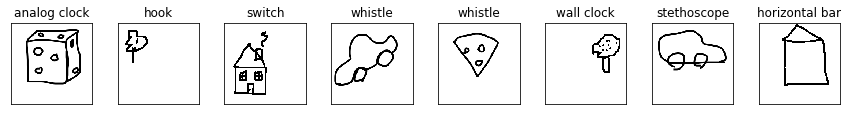

In [24]:
# Get pre-trained model without modifications
model = mh.get_module(iterator=test_iterator)
# Predict on our test data
predictions = np.argmax(model.predict(test_iterator), axis=1).asnumpy().astype(int)

# Plot all test images along with the predicted labels
images = get_images(test_iterator)
show_predictions(predictions, images, imagenet_class_to_human, None, (15, 1.5))


That clearly doesn't work. The images we have are different in nature that the ones that the pre-trained (source) model was trained on. Furthermore, the pre-trained images of the source model might not contain some of the labels we have here at all.

So far, we have agreed that:
(a) Training a neural network from scratch won't work in this case, since we have very few data.
(b) Re-using a pre-trained neural netwrok as is doesn't work either.


Solution is Repurposing: take a pre-trained neural network and repurpose it for the new task through transfer learning. 

In [25]:
repLR = xfer.LrRepurposer(source_model=source_model, feature_layer_names=['pool10'])
repLR.repurpose(train_iterator)
predictionsLR = repLR.predict_label(test_iterator)

/Users/damianou/anaconda/lib/python3.5/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


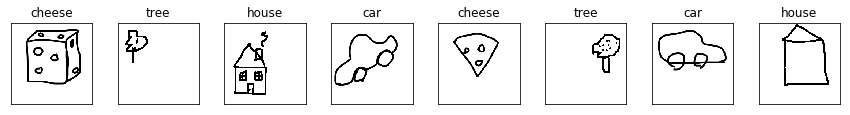

In [26]:
show_predictions(predictionsLR, images, id2label, None, (15,1.5))

Much better!

Other utilities: refining existing architectures really easily! 

In [27]:
print("Bottom layer name before addition: " + mh.layer_names[0])
conv1 = mx.sym.Convolution(name='new_conv_layer', kernel=(20,20), num_filter=64)
mh.add_layer_bottom([conv1])
print("Bottom layer name after addition: " + mh.layer_names[0])

# Dropping layers is also supported. The commented code below drops two top layers
# mh.drop_layer_top(2)

Bottom layer name before addition: conv1
Bottom layer name after addition: new_conv_layer


The following two figures demonstrate two ways of performing transfer learning: 

In [2]:
# from IPython.display import HTML
# HTML('<img src="https://cdn-images-1.medium.com/max/1600/1*YeDK4bgLMeikGNbSySoNUg.gif">')

In [1]:
# HTML('<img src="https://cdn-images-1.medium.com/max/1600/1*w8c3SbLq8b6wzsDgxPknzA.gif">')

To learn more, see tutorials here:
https://github.com/amzn/xfer   